## 4.10 Coding Etiquette and Excel Reporting

## Contents

1. Importing Libraries
2. Importing Data
3. Creating Regional Variables
4. Dropping Low Activity Customers
5. Profiling Customers
6. Aggregating Customer Profiles
7. Comparing Customer Profiles
8. Exporting Data

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
path = r'C:\Users\kensz\OneDrive\Desktop\CF Data Analytics Course\Achievement 4\11-2022 Instacart basket Analysis'

In [3]:
df_ic = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products.pkl'))

In [4]:
df_ic.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'busiest_period_of_day', 'max_order',
       'loyalty flag', 'average_prices', 'Spending_Flag',
       'median_order_frequency', 'frequency_tag', 'Gender', 'STATE', 'Age',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

There are some security implications involved in this data set. Specifically, we have data about customers age, family status, and income. However, during the data cleaning and wrangling portion of this project I scrubbed first and last names and only track customers on their user_id. 

## 03. Creating Region Variables

In [5]:
# assigning each STATE a region value

Region = []

for value in df_ic ['STATE']:
 if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    Region.append('North East')
 elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    Region.append('Midwest')
 elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    Region.append('South')
 else:
    Region.append('West')

In [6]:
Region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Mi

In [7]:
#adding region to original dataset

df_ic['region'] = Region

In [8]:
df_ic['region'].value_counts(dropna = False)

South         10099817
West           7765088
Midwest        7107586
North East     5356272
Name: region, dtype: int64

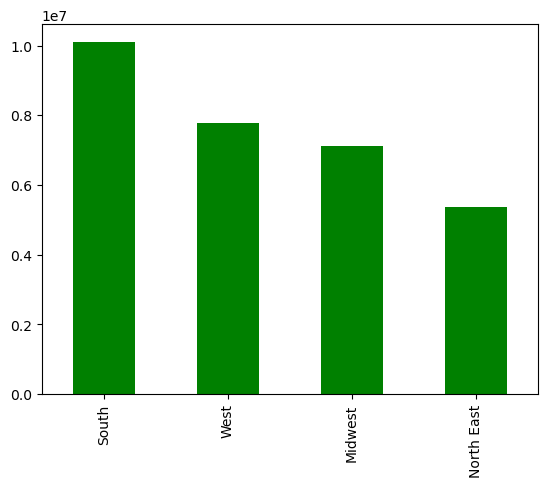

In [9]:
region_bar = df_ic['region'].value_counts().plot.bar(color = 'green')

In [10]:
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_bar.png'))

## Crossing Regions with Spending Habits


In [19]:
# creating a crosstab

crosstab = pd.crosstab(df_ic['region'], df_ic['Spending_Flag'], dropna = False)

In [22]:
crosstab

Spending_Flag,High Spender,Low Spender
region,,
Midwest,148321,6959265
North East,102905,5253367
South,197110,9902707
West,149922,7615166


In [20]:
crosstab.to_clipboard()

## 04. Dropping Low Activity Customers

In [24]:
#Creating a low activity flag for customers
df_ic.loc[df_ic['max_order']>=5, 'activity flag'] = 'normal activity customer'
df_ic.loc[df_ic['max_order']<5, 'activity flag'] = 'low activity customer'

In [23]:
df_ic['activity flag'].value_counts(dropna = False)

normal activity customer    29303281
low activity customer        1025482
Name: activity flag, dtype: int64

In [25]:
len(df_ic)

30328763

In [26]:
len(df_ic['activity flag'])

30328763

### Creating subsets for activity levels

#### Creating Low Activity Subset

In [28]:
df_ic_lowactivity = df_ic[df_ic['activity flag'] == 'low activity customer']

In [29]:
df_ic_lowactivity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_order_frequency,frequency_tag,Gender,STATE,Age,n_dependants,fam_status,income,region,activity flag
1411,3273029,120,3,2,8,19.0,196,2,1,Soda,...,19.0,Regular customer,Female,Kentucky,54,2,married,99219,South,low activity customer
1412,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,19.0,Regular customer,Female,Kentucky,54,2,married,99219,South,low activity customer
1413,906054,120,2,4,7,15.0,31102,1,0,Sugar Free Energy Drink,...,19.0,Regular customer,Female,Kentucky,54,2,married,99219,South,low activity customer
1414,3273029,120,3,2,8,19.0,31102,3,1,Sugar Free Energy Drink,...,19.0,Regular customer,Female,Kentucky,54,2,married,99219,South,low activity customer
3716,1469869,377,3,5,17,3.0,196,9,0,Soda,...,16.5,Regular customer,Female,Maine,49,2,married,108557,North East,low activity customer


In [30]:
#checking low activity flag size for consistency

df_ic_lowactivity.shape

(1025482, 33)

In [31]:
#exporting low activity customers

df_ic_lowactivity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

#### Creating Regular activity subset

In [32]:
df_ic_regular = df_ic[df_ic['activity flag'] == 'normal activity customer']

In [33]:
df_ic_regular.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_order_frequency,frequency_tag,Gender,STATE,Age,n_dependants,fam_status,income,region,activity flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity customer
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity customer
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity customer
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity customer
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity customer


In [34]:
df_ic_regular.shape

(29303281, 33)

In [35]:
df_ic_regular.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'reg_activity_customers.pkl'))

## 05. Profiling Customers

### Profiling based on age

In [36]:
#Creating age group tags
df_ic.loc[df_ic['Age'] >=65, 'age_group'] = 'Senior'
df_ic.loc[(df_ic['Age'] > 35) & (df_ic['Age'] <65), 'age_group'] = 'Middle Age'
df_ic.loc[df_ic['Age'] <= 35, 'age_group'] = 'Young Adult'

In [37]:
df_ic['age_group'].value_counts(dropna = False)

Middle Age     13743703
Young Adult     8560115
Senior          8024945
Name: age_group, dtype: int64

#### Age Profile Visualization

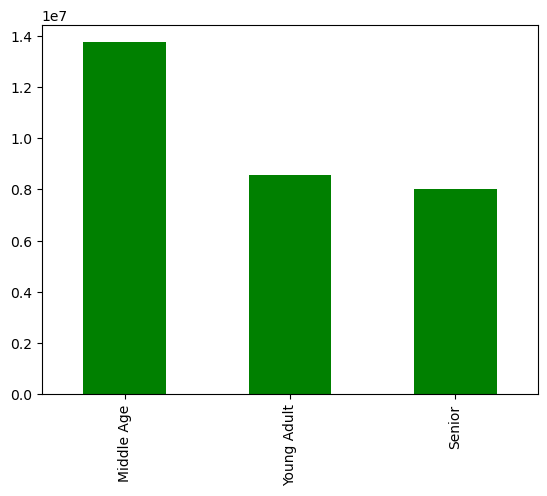

In [38]:
age_bar = df_ic['age_group'].value_counts().plot.bar(color = 'green')

In [39]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

### Profiling Based on Income

In [53]:
#creating income profile flags based on US Income tax brackets

df_ic.loc[df_ic['income'] > 462500, 'income_group'] = 'High Income'
df_ic.loc[(df_ic['income'] > 364200 ) & (df_ic['income'] <= 462500), 'income_group'] = 'Upper Middle Income'
df_ic.loc[(df_ic['income'] > 190750 ) & (df_ic['income'] <=364200), 'income_group'] = 'Middle Income'
df_ic.loc[(df_ic['income'] > 89450 ) & (df_ic['income'] <=190750 ), 'income_group'] = 'Lower Middle Income'
df_ic.loc[(df_ic['income'] > 22000 ) & (df_ic['income'] <=89450 ), 'income_group'] = 'Upper Low Income'
df_ic.loc[df_ic['income'] <= 22000, 'income_group'] = 'Low Income'

In [54]:
df_ic['income_group'].value_counts(dropna = False)

Lower Middle Income    17277696
Upper Low Income       12789139
Middle Income            200754
Upper Middle Income       36461
High Income               24713
Name: income_group, dtype: int64

#### Income Profile Chart

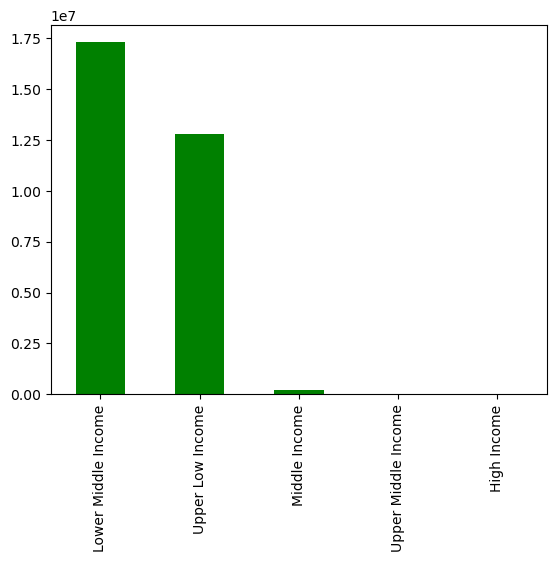

In [55]:
income_profile_bar = df_ic['income_group'].value_counts().plot.bar(color = 'green')

In [133]:
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

### Profiling based on number of dependants

In [59]:
df_ic['n_dependants'].describe()

count    3.032876e+07
mean     1.501960e+00
std      1.118932e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [71]:
#creating flags for family size

df_ic.loc[df_ic['n_dependants'] >=3, 'family_size'] = 'Large Family'
df_ic.loc[(df_ic['n_dependants'] > 1) & (df_ic['n_dependants'] <3), 'family_size'] = 'Medium Family'
df_ic.loc[df_ic['n_dependants'] <= 1, 'family_size'] = 'Small Family'

In [72]:
df_ic['family_size'].value_counts(dropna = False)

Small Family     15141142
Large Family      7615541
Medium Family     7572080
Name: family_size, dtype: int64

#### Family Size Chart

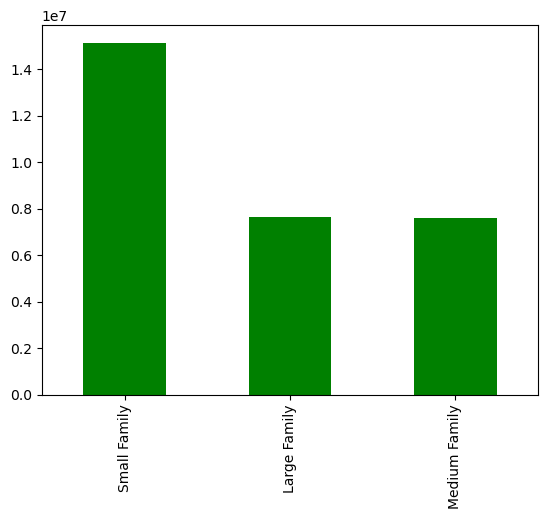

In [73]:
family_profile_bar = df_ic['family_size'].value_counts().plot.bar(color = 'green')

In [132]:
family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

##### Accidentally created two family size columns, so I'm removing one.

In [77]:
df_ic.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'busiest_period_of_day', 'max_order',
       'loyalty flag', 'average_prices', 'Spending_Flag',
       'median_order_frequency', 'frequency_tag', 'Gender', 'STATE', 'Age',
       'n_dependants', 'fam_status', 'income', 'region', 'activity flag',
       'age_group', 'income_group', 'family_size', 'family size'],
      dtype='object')

In [79]:
df_ic = df_ic.drop(columns = ['family size', '_merge'])

In [80]:
df_ic.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'busiest_period_of_day', 'max_order',
       'loyalty flag', 'average_prices', 'Spending_Flag',
       'median_order_frequency', 'frequency_tag', 'Gender', 'STATE', 'Age',
       'n_dependants', 'fam_status', 'income', 'region', 'activity flag',
       'age_group', 'income_group', 'family_size'],
      dtype='object')

### Department Purchase Profiles

In [106]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [107]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


#### Vegetarian Flag

In [110]:
# aisle 12 and 20 are the deli and meat/seafood isles. These products are not vegetarian, therefore users that don't use these aisles are likely vegetarian
vegetarian_flag = []

for value in df_ic['department_id']:
    if value in (12,20):
        vegetarian_flag.append('Not Vegetarian')
    else:
        vegetarian_flag.append('Vegetarian')

In [114]:
df_ic['vegetarian'] = vegetarian_flag

In [115]:
df_ic['vegetarian'].value_counts(dropna = False)

Vegetarian        28686053
Not Vegetarian     1642710
Name: vegetarian, dtype: int64

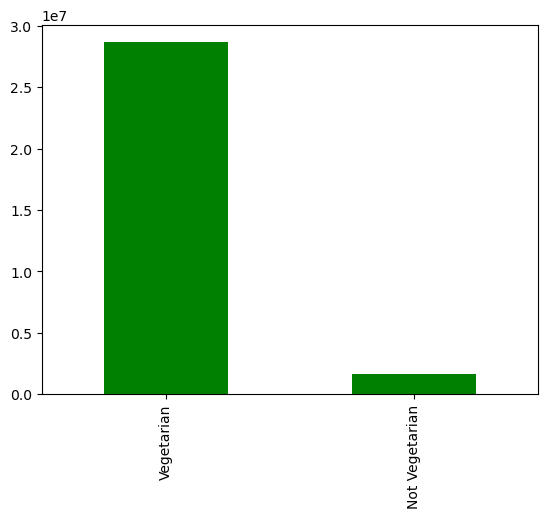

In [119]:
vegetarian_bar = df_ic['vegetarian'].value_counts().plot.bar(color = 'green')

In [135]:
vegetarian_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'veg_profile_bar.png'))

#### Cooking Status 

In [116]:
# Departments 1, 3, 15, 19, and 20 are frozen, bakery, canned goods, snacks, and deli. All these aisles provide ready to eat food. Users to order from these departments probably dont cook as much as users who order more ingredients. Addtionally 11, 17, and 18 are not food
cooking_status = []

for value in df_ic['department_id']:
    if value in (1, 3, 11, 15, 17, 18, 19, 20):
        cooking_status.append('not cooking')
    else:
        cooking_status.append('cooking')
        

In [117]:
df_ic['cooking_status'] = cooking_status

In [118]:
df_ic['cooking_status'].value_counts(dropna = False)

cooking        20968797
not cooking     9359966
Name: cooking_status, dtype: int64

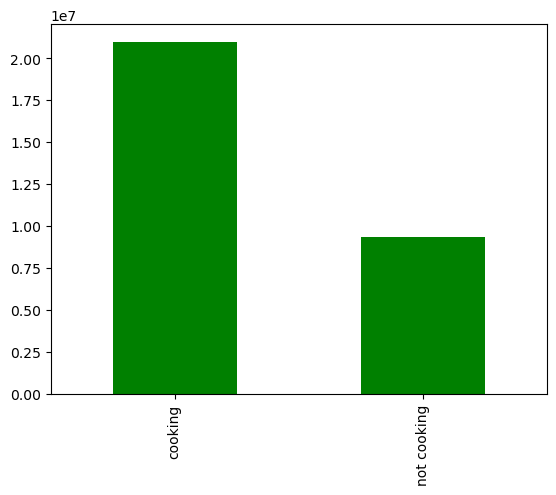

In [120]:
cooking_bar = df_ic['cooking_status'].value_counts().plot.bar(color = 'green')

In [136]:
cooking_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cooking_bar.png'))

## 06. Aggregating Data Based on Customer Profiles

#### Aggregating Age Data

In [122]:
df_ic.groupby('age_group').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                  mean min max
age_group                     
Middle Age   34.303756   2  99
Senior       34.108530   2  99
Young Adult  34.126519   3  99

In [124]:
df_ic.groupby('age_group').agg({'average_prices': ['mean', 'min', 'max']})

average_prices                   
                      mean  min           max
age_group                                    
Middle Age       12.055065  1.0  33339.033333
Senior           11.746983  1.0  13468.890385
Young Adult      12.068183  1.0  25004.575000

#### Aggregating Income Data

In [125]:
df_ic.groupby('income_group').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                          mean min max
income_group                          
High Income          35.071056   3  99
Lower Middle Income  34.361077   2  99
Middle Income        38.821035   3  99
Upper Low Income     33.902027   2  99
Upper Middle Income  38.080634   3  99

In [126]:
df_ic.groupby('income_group').agg({'average_prices': ['mean', 'min', 'max']})

average_prices                        
                              mean       min           max
income_group                                              
High Income             177.550055  6.841748   7900.663158
Lower Middle Income      11.431948  1.200000  25004.575000
Middle Income           253.750499  5.288889  33339.033333
Upper Low Income          7.623882  1.000000   4004.868000
Upper Middle Income     353.948625  5.500000  12507.431250

#### Aggregating Family Size Data

In [127]:
df_ic.groupby('family_size').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                    mean min max
family_size                     
Large Family   34.177841   2  99
Medium Family  34.043801   2  99
Small Family   34.293417   2  99

In [128]:
df_ic.groupby('family_size').agg({'average_prices': ['mean', 'min', 'max']})

average_prices                   
                        mean  min           max
family_size                                    
Large Family       11.741433  1.0   9529.892857
Medium Family      12.457127  1.0  13050.795652
Small Family       11.855871  1.0  33339.033333

#### Aggregating Vegetarian Data


In [129]:
df_ic.groupby('vegetarian').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                     mean min max
vegetarian                       
Not Vegetarian  33.028765   3  99
Vegetarian      34.269265   2  99

In [130]:
df_ic.groupby('vegetarian').agg({'average_prices': ['mean', 'min', 'max']})

average_prices                   
                         mean  min           max
vegetarian                                      
Not Vegetarian      11.868792  1.4  14292.911429
Vegetarian          11.983460  1.0  33339.033333

#### Aggregating Cooking Data

In [139]:
df_ic.groupby('cooking_status').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                     mean min max
cooking_status                   
cooking         34.624395   2  99
not cooking     33.255967   3  99

In [138]:
df_ic.groupby('cooking_status').agg({'average_prices': ['mean', 'min', 'max']})

average_prices                   
                         mean  min           max
cooking_status                                  
cooking             11.820367  1.1  33339.033333
not cooking         12.328708  1.0  25004.575000

## 07. Comparing Profiles to Regions

In [145]:
age_region_ct = pd.crosstab(df_ic['region'], df_ic['age_group'], dropna = False)

In [146]:
age_region_ct

age_group,Middle Age,Senior,Young Adult
region,,,
Midwest,3269239,1861410,1976937
North East,2379900,1455684,1520688
South,4555857,2653643,2890317
West,3538707,2054208,2172173


In [147]:
age_region_ct.to_clipboard()

In [148]:
income_region_ct = pd.crosstab(df_ic['region'], df_ic['income_group'], dropna = False)

In [149]:
income_region_ct

income_group,High Income,Lower Middle Income,Middle Income,Upper Low Income,Upper Middle Income
region,,,,,
Midwest,9908,4073707,46425,2967364,10182
North East,4019,3081053,32697,2233063,5440
South,5557,5708742,70145,4304368,11005
West,5229,4414194,51487,3284344,9834


In [150]:
income_region_ct.to_clipboard()

In [152]:
family_region_ct = pd.crosstab(df_ic['region'], df_ic['family_size'], dropna = False)

In [153]:
family_region_ct

family_size,Large Family,Medium Family,Small Family
region,,,
Midwest,1752016,1768912,3586658
North East,1353249,1326444,2676579
South,2533887,2549581,5016349
West,1976389,1927143,3861556


In [154]:
family_region_ct.to_clipboard()

In [155]:
vegetarian_region_ct = pd.crosstab(df_ic['region'], df_ic['vegetarian'], dropna = False)

In [156]:
vegetarian_region_ct

vegetarian,Not Vegetarian,Vegetarian
region,,
Midwest,384146,6723440
North East,290706,5065566
South,545916,9553901
West,421942,7343146


In [157]:
vegetarian_region_ct.to_clipboard()

In [158]:
cooking_region_ct = pd.crosstab(df_ic['region'], df_ic['cooking_status'], dropna = False)

In [159]:
cooking_region_ct

cooking_status,cooking,not cooking
region,,
Midwest,4915176,2192410
North East,3700548,1655724
South,6984688,3115129
West,5368385,2396703


In [162]:
cooking_region_ct.to_clipboard()

## 08. Comparing Profiles to Departments

In [163]:
age_dep_ct = pd.crosstab(df_ic['department_id'], df_ic['age_group'], dropna = False)

In [164]:
age_dep_ct

age_group,Middle Age,Senior,Young Adult
department_id,,,
1,940416,552106,584013
2,15375,8822,9728
3,497232,289387,310549
4,4032016,2358888,2504003
5,64058,35747,41177
6,113357,65743,71193
7,1146616,670387,703629
8,40623,24690,25780
9,364755,212858,228032


In [166]:
age_dep_ct.to_clipboard()

In [167]:
income_dep_ct = pd.crosstab(df_ic['department_id'], df_ic['income_group'], dropna = False)

In [168]:
income_dep_ct

income_group,High Income,Lower Middle Income,Middle Income,Upper Low Income,Upper Middle Income
department_id,,,,,
1,1760,1197293,16230,858598,2654
2,32,19076,356,14376,85
3,1038,636291,10390,447741,1708
4,5241,5192309,38548,3651851,6958
5,731,77087,4346,57723,1095
6,232,146927,1540,101295,299
7,2421,1362478,19427,1132920,3386
8,168,53164,1405,36001,355
9,816,477475,5366,320997,991


In [169]:
income_dep_ct.to_clipboard()

In [170]:
family_dep_ct = pd.crosstab(df_ic['department_id'], df_ic['family_size'], dropna = False)

In [171]:
family_dep_ct

family_size,Large Family,Medium Family,Small Family
department_id,,,
1,521279,522191,1033065
2,8281,8482,17162
3,274227,273293,549648
4,2241404,2210962,4442541
5,36425,33646,70911
6,62085,61916,126292
7,628194,633479,1258959
8,22693,22131,46269
9,204334,200364,400947


In [173]:
family_dep_ct.to_clipboard()

Vegetarian and Cooking_status were determined by looking at departments, crosstabulating them does not provide any new insights

Visualizations for the Crosstabulation saved in Excel under 02 Data, Prepared Data

## 08. Exporting Data

In [177]:
df_ic.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_analysis_final.pkl'))